In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
data = pd.read_csv("./fuel_econ.csv")
data.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [4]:
data.describe()

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
count,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000
mean,36006.724357,2015.500891,5.468313,2.950573,23.660982,59.239247,21.830462,28.044011,29.973842,42.850295,24.791339,376.564266,5.668872,5.659201
std,2189.349923,1.694775,1.878319,1.305901,37.724901,48.667549,6.246273,9.087195,5.747571,9.100423,6.003246,92.338892,1.755860,1.754589
min,32204.000000,2013.000000,2.000000,0.600000,0.000000,0.000000,10.540200,12.900000,16.559400,21.800000,12.821700,29.000000,1.000000,1.000000
25%,34087.000000,2014.000000,4.000000,2.000000,0.000000,0.000000,17.746900,22.200000,25.754200,36.000000,20.658100,315.000000,5.000000,5.000000
50%,36020.000000,2015.000000,5.000000,2.500000,0.000000,91.000000,20.823200,26.400000,29.633800,42.200000,24.000000,369.000000,5.000000,5.000000
75%,37935.000000,2017.000000,6.000000,3.600000,70.000000,100.000000,24.981400,32.264800,33.773100,48.900000,28.227100,429.000000,7.000000,7.000000
max,39901.000000,2018.000000,12.000000,7.000000,102.000000,127.000000,57.808800,83.559800,59.416900,79.100000,57.782400,692.000000,10.000000,10.000000


A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot.

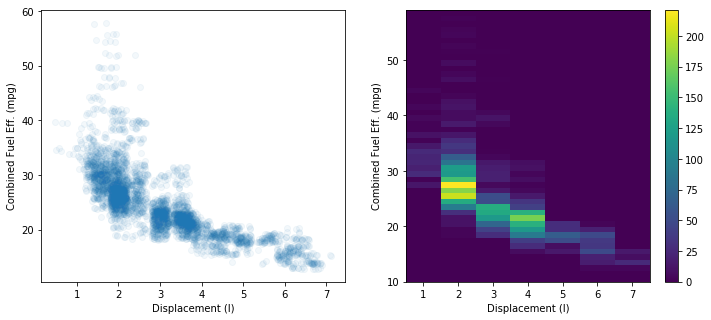

In [11]:
plt.figure(figsize = [12, 5])

# left plot: scatterplot of discrete data with jitter and transparency
plt.subplot(1, 2, 1)
sb.regplot(data = data, x = 'displ', y = 'comb', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/20})
plt.xlabel("Displacement (l)");
plt.ylabel("Combined Fuel Eff. (mpg)");

# right plot: heat map with bin edges between values
plt.subplot(1, 2, 2)
bins_x = np.arange(0.5, 7+1, 1)
bins_y = np.arange(10, 60, 1)
plt.hist2d(data = data, x = 'displ', y = 'comb',
           bins = [bins_x, bins_y])
plt.xlabel("Displacement (l)");
plt.ylabel("Combined Fuel Eff. (mpg)");
# color bar adds the colored bar to the right of the chart
plt.colorbar();

To select a different color palette, you can set the "cmap" parameter in hist2d.  Also we want to distinguish cells with zero counts from those with non-zero counts.  The "cmin" parameter specifies the minimum value in a cell before it will be plotted. 
  

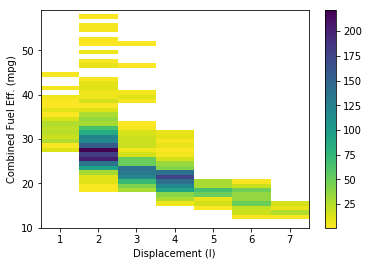

In [13]:
bins_x = np.arange(0.5, 7+1, 1)
bins_y = np.arange(10, 60, 1)
plt.hist2d(data = data, x = 'displ', y = 'comb',
           bins = [bins_x, bins_y], cmap = "viridis_r", cmin = 0.5)
plt.xlabel("Displacement (l)");
plt.ylabel("Combined Fuel Eff. (mpg)");
# color bar adds the colored bar to the right of the chart
plt.colorbar();

If you have a lot of data, you might want to add annotations to cells in the plot indicating the count of points in each cell. From hist2d, this requires the addition of text elements one by one, much like how text annotations were added one by one to the bar plots in the previous lesson. We can get the counts to annotate directly from what is returned by hist2d, which includes not just the plotting object, but an array of counts and two vectors of bin edges.

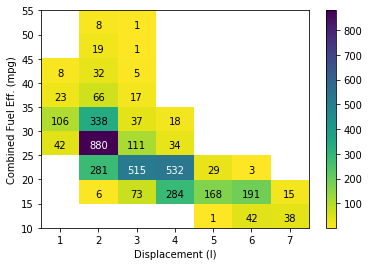

In [24]:
bins_x = np.arange(0.5, 7+1, 1)
bins_y = np.arange(10, 60, 5)
h2d = plt.hist2d(data = data, x = 'displ', y = 'comb',
           bins = [bins_x, bins_y], cmap = "viridis_r", cmin = 0.5)
plt.xlabel("Displacement (l)");
plt.ylabel("Combined Fuel Eff. (mpg)");
plt.colorbar();

counts = h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 400: # increase visibility on darkest cells
            plt.text(bins_x[i]+0.5, bins_y[j]+2, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+2, int(c),
                     ha = 'center', va = 'center', color = 'black')

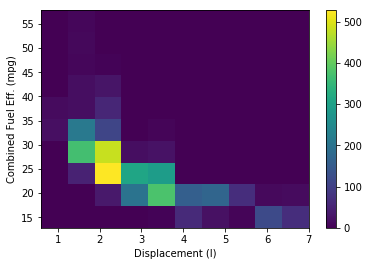

In [25]:
plt.hist2d(data = data, x = 'displ', y = 'comb')
plt.colorbar()
plt.xlabel("Displacement (l)");
plt.ylabel("Combined Fuel Eff. (mpg)");

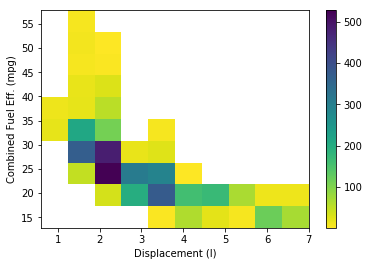

In [27]:
plt.hist2d(data = data, x = 'displ', y = 'comb', cmin = 0.5, cmap="viridis_r")
# the _r in the viridis is is the reverse color map
plt.colorbar()
plt.xlabel("Displacement (l)");
plt.ylabel("Combined Fuel Eff. (mpg)");

So the instructor decided that the bin sizes for this data is 0.3 for the displacement and 3 for fuel effeciency.  I think this relates to information given previously in the course.  This is a much better chart.  So the start, end and the step are all factors of the selected size.  I need to remember this. 

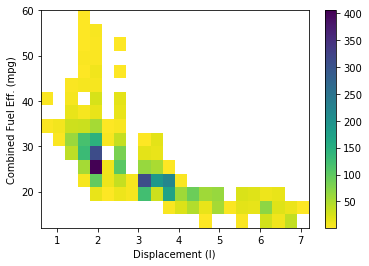

In [28]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
h2d = plt.hist2d(data = data, x = 'displ', y = 'comb',
           bins = [bins_x, bins_y], cmap = "viridis_r", cmin = 0.5)
plt.xlabel("Displacement (l)");
plt.ylabel("Combined Fuel Eff. (mpg)");
plt.colorbar();

HEATMAP PRACTICE

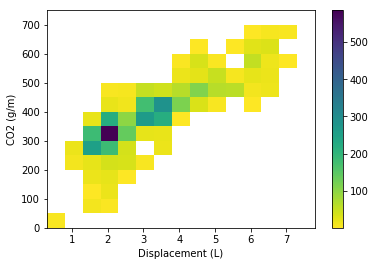

In [32]:
bins_x = np.arange(0.3, 7.3+1, 0.5)
bins_y = np.arange(0, 800, 50)
plt.hist2d(data = data, x = "displ", y = "co2", cmap="viridis_r", cmin=0.5, bins=[bins_x, bins_y]);
plt.colorbar()
plt.xlabel("Displacement (L)")
plt.ylabel("CO2 (g/m)");